# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Final Data/pct-diff-mlb-games-with-preds.csv')

In [3]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,Rank_pct_diff,WPA_pct_diff,log_5,home_win,xgb_pred,knn_pred,nn_pred,xgb_proba,knn_proba,nn_proba
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.000000,96.381239,0.5,1,1,1,1,0.562908,0.566667,0.590414
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,50.000000,96.381239,0.5,1,1,1,1,0.533676,0.573333,0.563689
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,75.000000,96.381239,0.5,0,0,1,1,0.454400,0.626667,0.666198
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,0.000000,96.381239,0.5,0,0,1,1,0.450952,0.586667,0.531114
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,-66.666667,96.381239,0.5,0,1,1,1,0.584152,0.620000,0.562535


## Column distribution by model

In [4]:
df['xgb_correct'] = df['home_win'] == df['xgb_pred']
df['knn_correct'] = df['home_win'] == df['knn_pred']
df['nn_correct'] = df['home_win'] == df['nn_pred']

In [19]:
def adjust_proba(x):
    if x > 0.5:
        return 2*(x - 0.5)
    else:
        return 2*(1 - x - 0.5)

In [20]:
df['xgb_proba_majority'] = df['xgb_proba'].apply(adjust_proba)
df['knn_proba_majority'] = df['knn_proba'].apply(adjust_proba)
df['nn_proba_majority'] = df['nn_proba'].apply(adjust_proba)

In [21]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,nn_pred,xgb_proba,knn_proba,nn_proba,xgb_correct,knn_correct,nn_correct,xgb_proba_majority,knn_proba_majority,nn_proba_majority
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,1,0.562908,0.566667,0.590414,True,True,True,0.125817,0.133333,0.180827
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,1,0.533676,0.573333,0.563689,True,True,True,0.067352,0.146667,0.127378
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,1,0.454400,0.626667,0.666198,True,False,False,0.091201,0.253333,0.332396
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,1,0.450952,0.586667,0.531114,True,False,False,0.098096,0.173333,0.062229
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,1,0.584152,0.620000,0.562535,False,False,False,0.168304,0.240000,0.125070


In [69]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [12]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [13]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

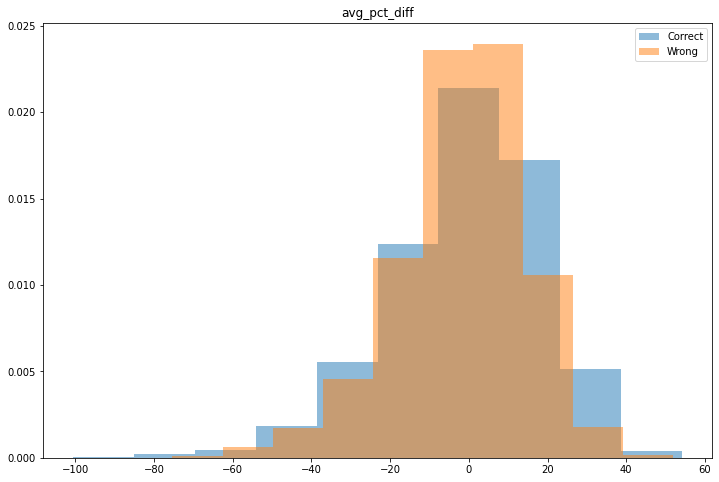

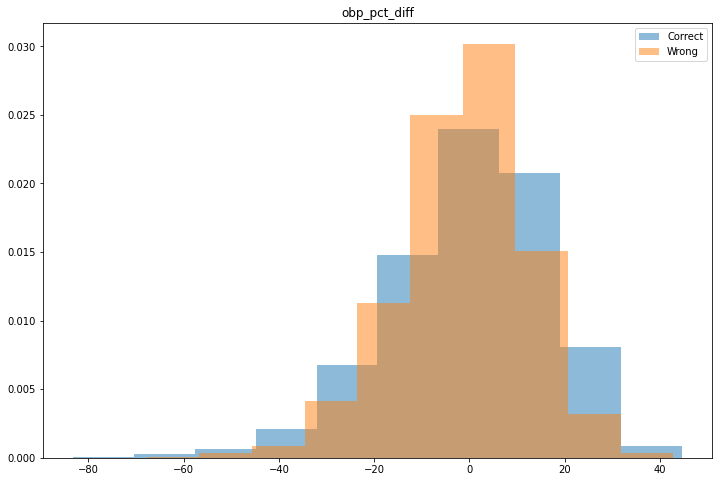

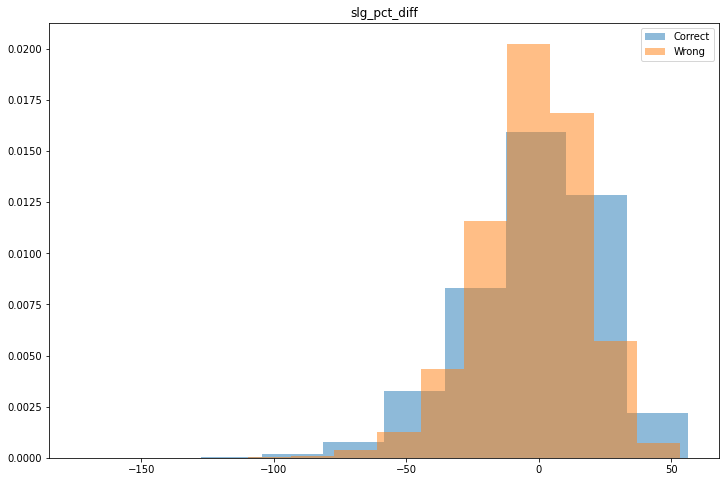

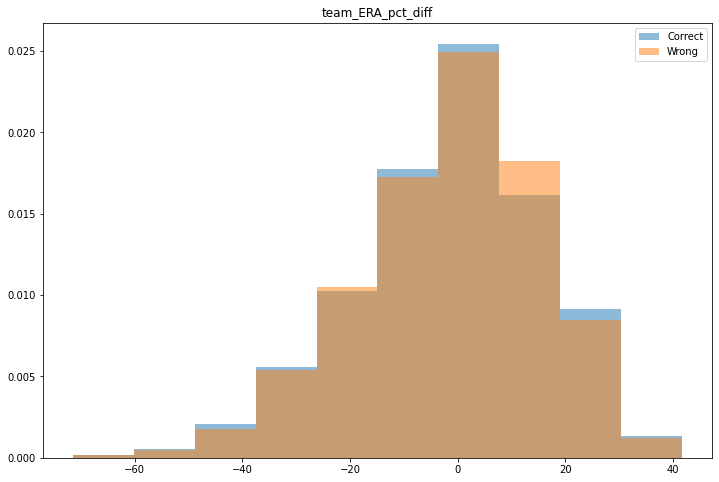

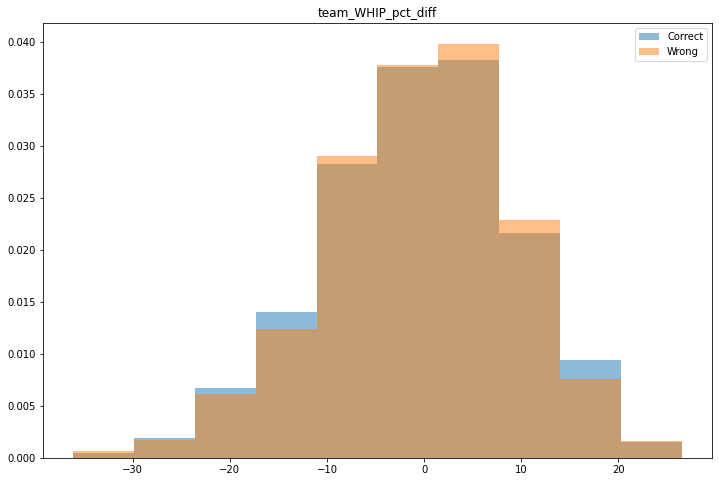

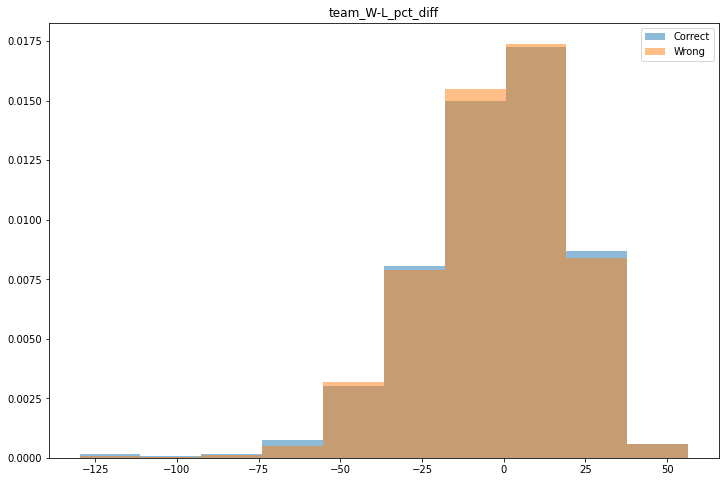

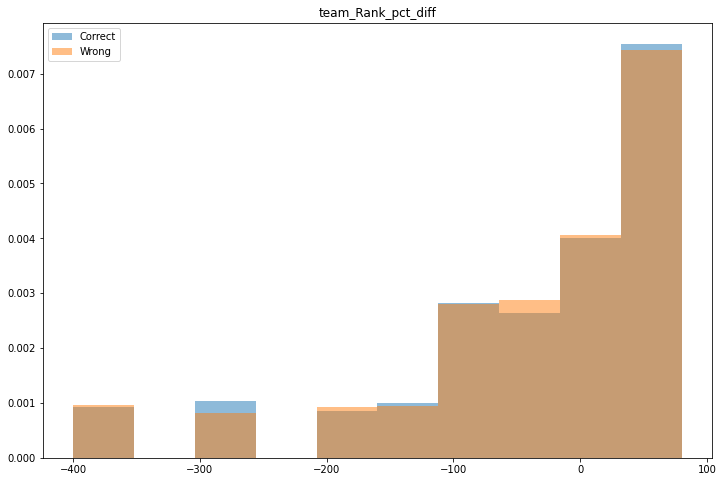

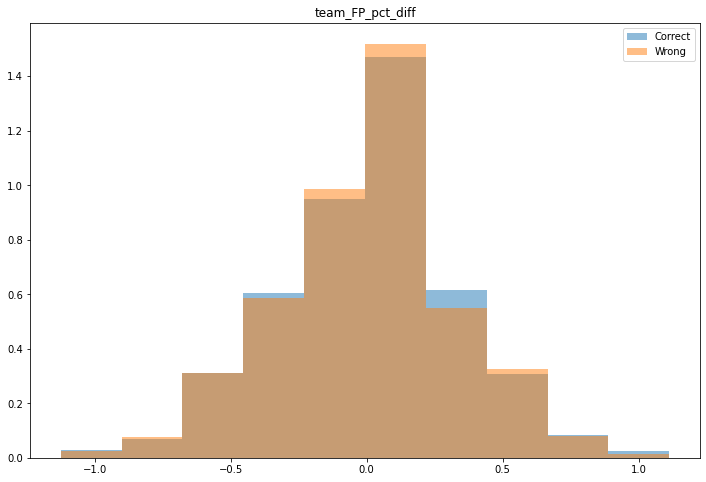

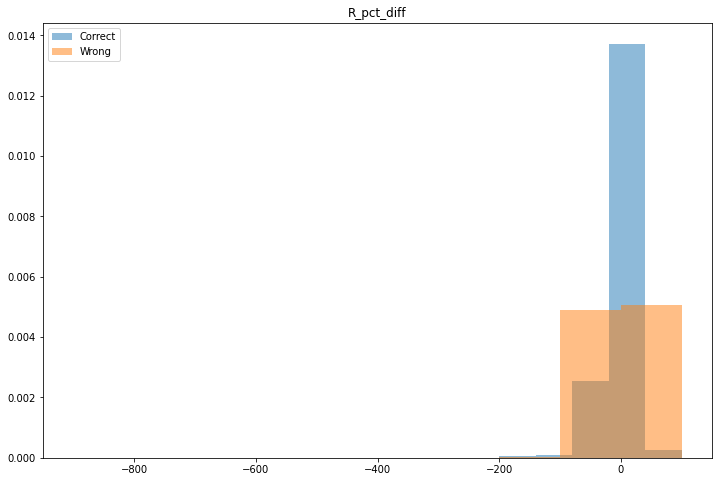

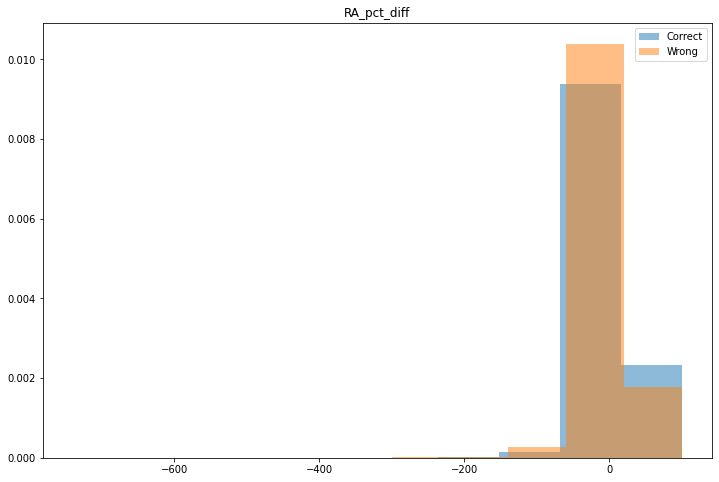

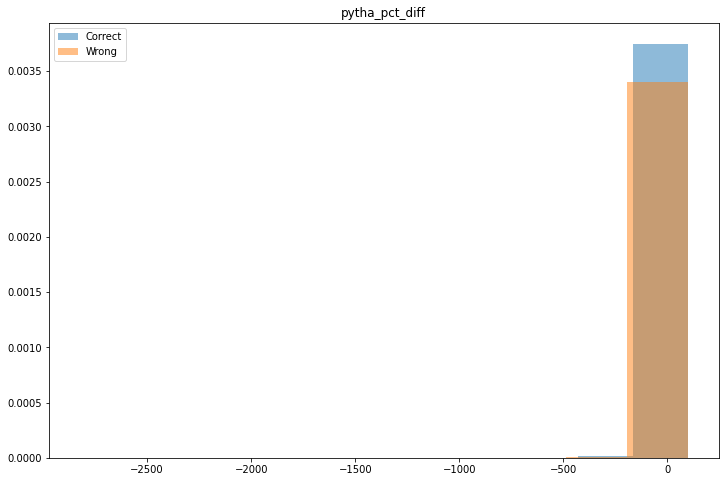

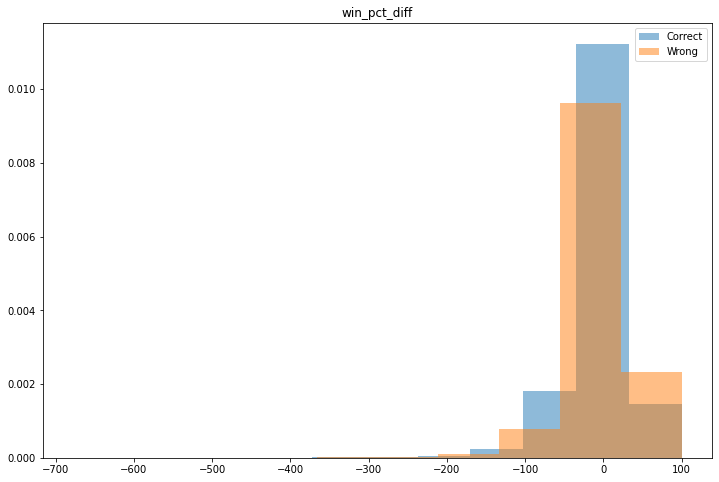

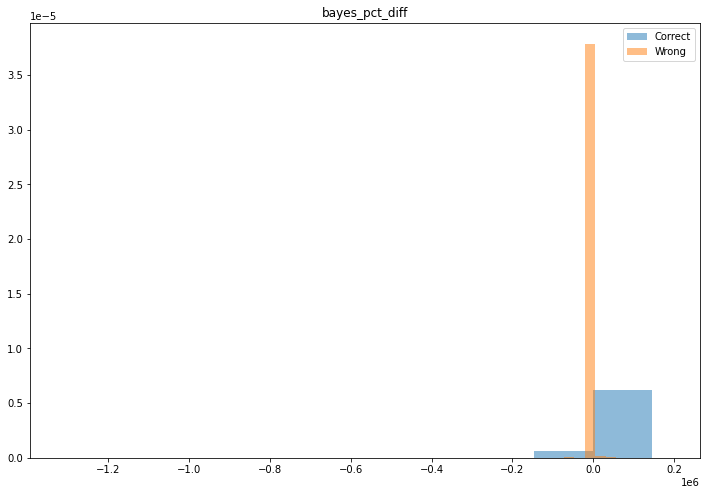

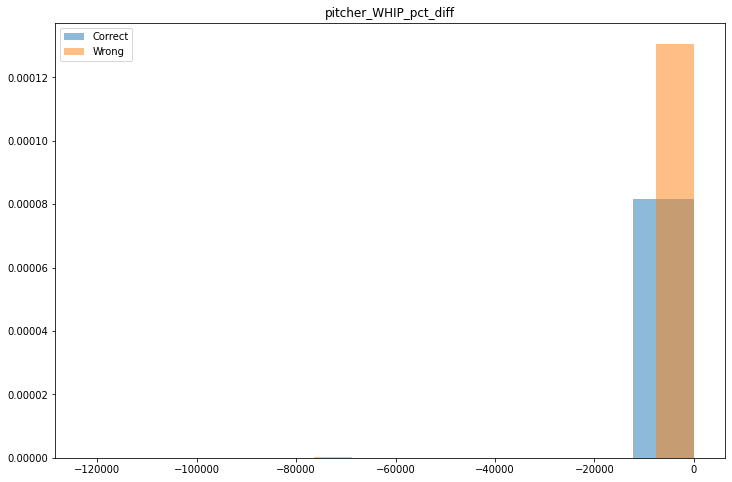

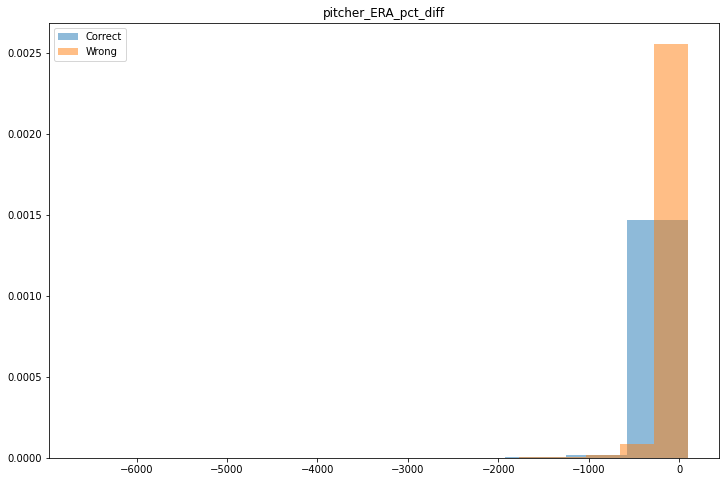

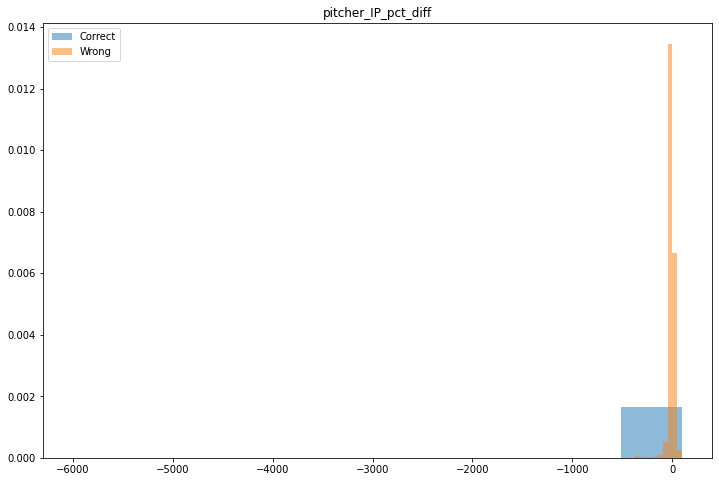

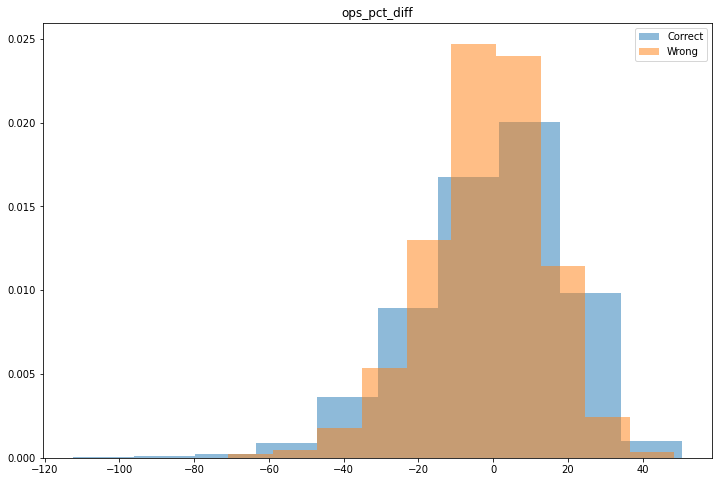

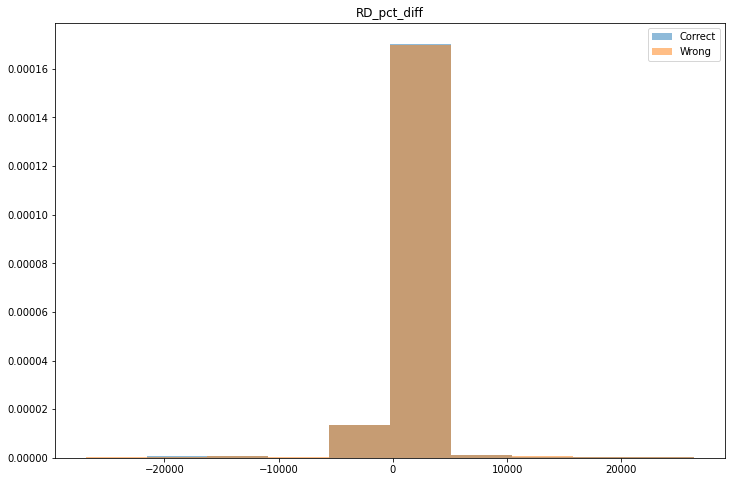

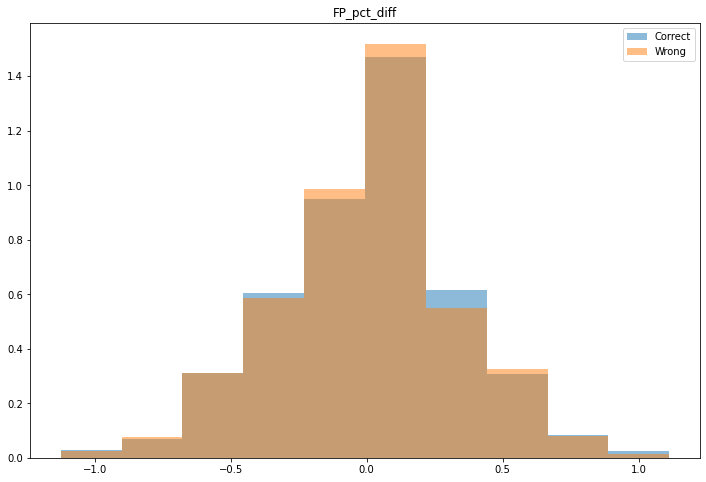

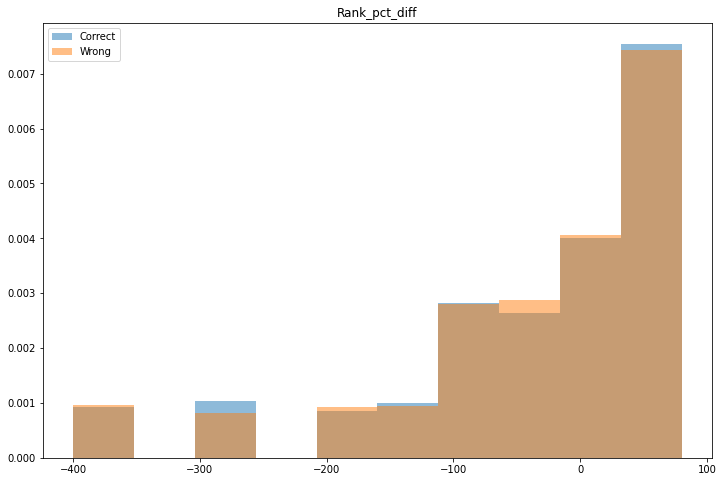

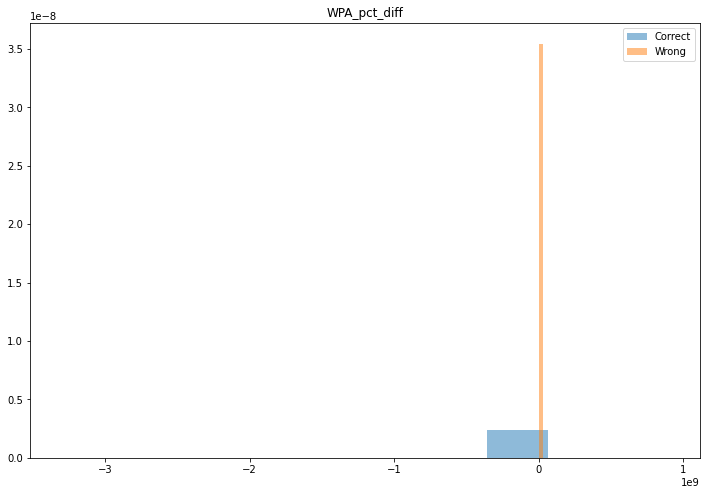

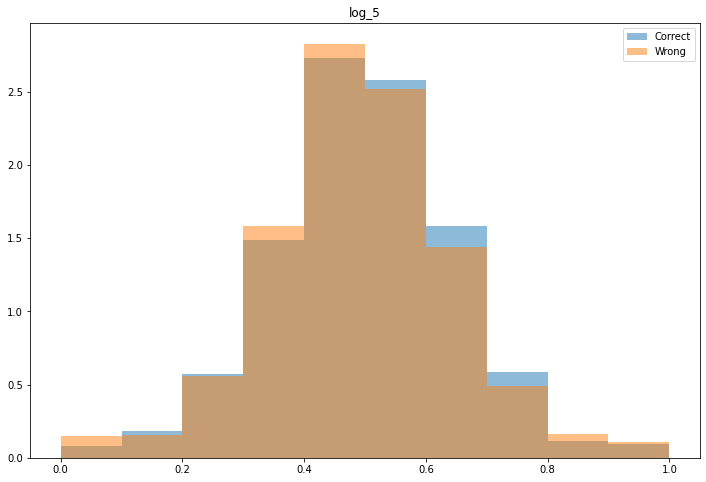

In [14]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [17]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

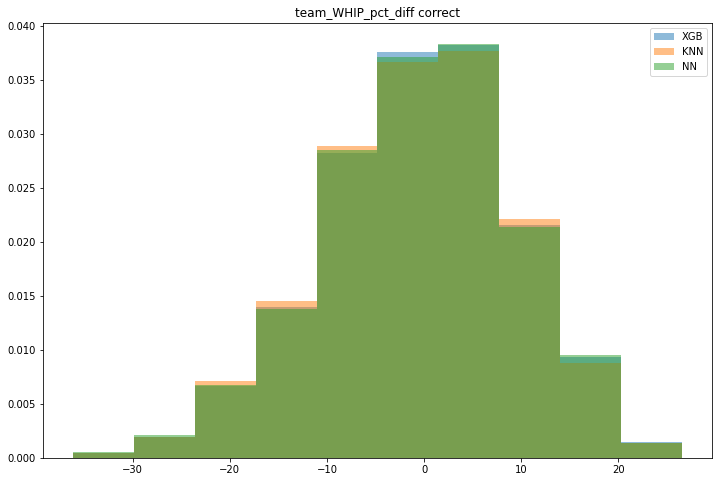

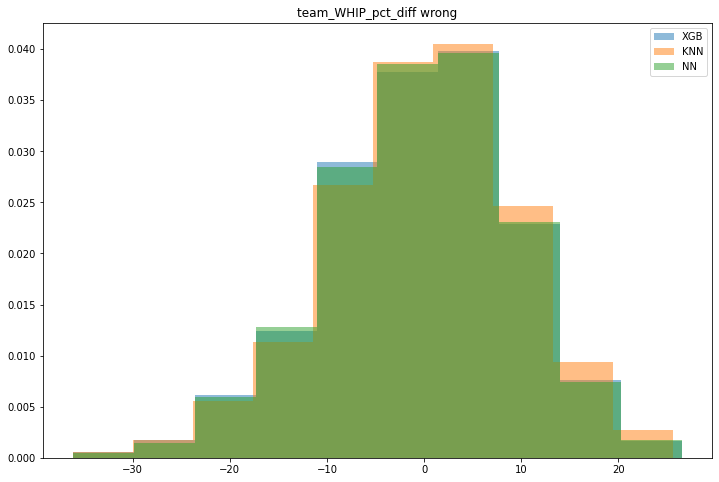

In [20]:
plot_density_across_models('team_WHIP_pct_diff')

## Accuracy by team

In [26]:
df['xgb_correct'] = (df['home_win'] == df['xgb_pred']).astype(bool)
df['knn_correct'] = (df['home_win'] == df['knn_pred']).astype(bool)
df['nn_correct'] = (df['home_win'] == df['nn_pred']).astype(bool)

In [27]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,Rank_pct_diff,WPA_pct_diff,log_5,home_win,xgb_pred,knn_pred,nn_pred,xgb_correct,knn_correct,nn_correct
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.000000,96.381239,0.5,1,1,1,1,True,True,True
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,50.000000,96.381239,0.5,1,1,1,1,True,True,True
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,75.000000,96.381239,0.5,0,0,1,1,True,False,False
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,0.000000,96.381239,0.5,0,0,1,1,True,False,False
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,-66.666667,96.381239,0.5,0,1,1,1,False,False,False


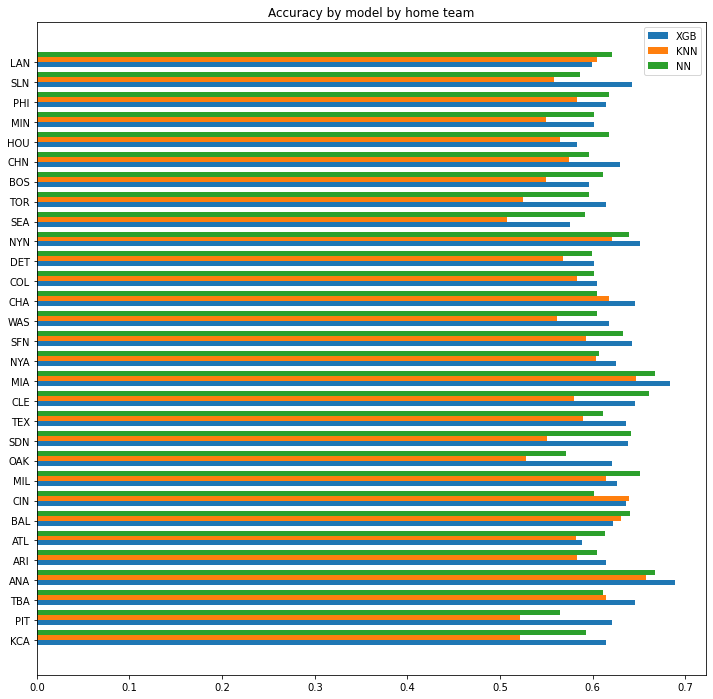

In [44]:
N = df['home_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('home_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('home_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('home_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['home_team'].unique())
plt.legend()
plt.title('Accuracy by model by home team');

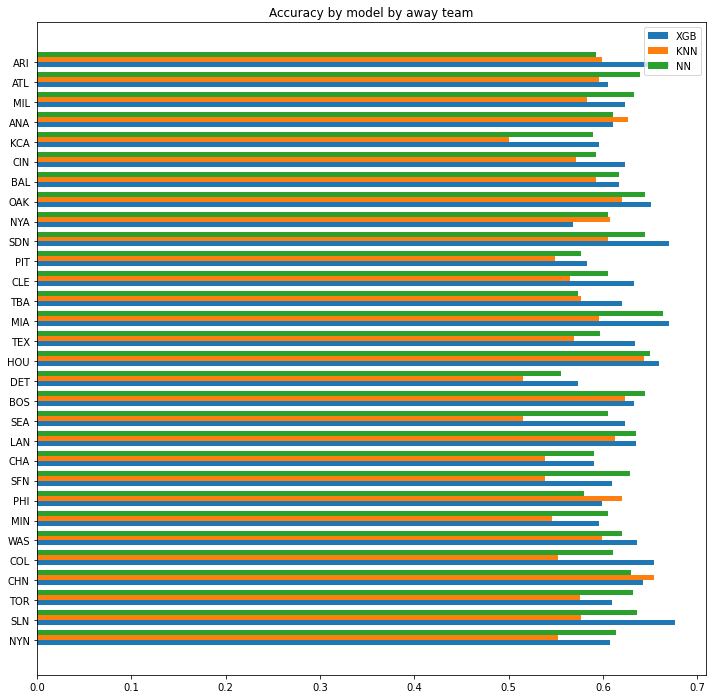

In [46]:
N = df['away_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('away_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('away_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('away_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['away_team'].unique())
plt.legend()
plt.title('Accuracy by model by away team');

## Heatmap of model accuracy by year by team

In [53]:
model_acc = df.groupby(['Y', 'home_team'])[['xgb_correct', 'knn_correct', 'nn_correct']].mean()

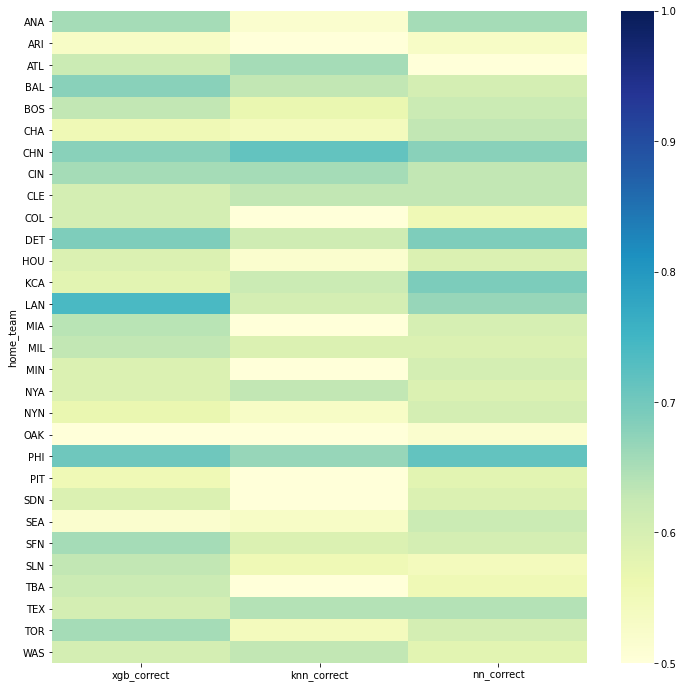

In [64]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2016], vmin=0.5, vmax=1, cmap="YlGnBu");

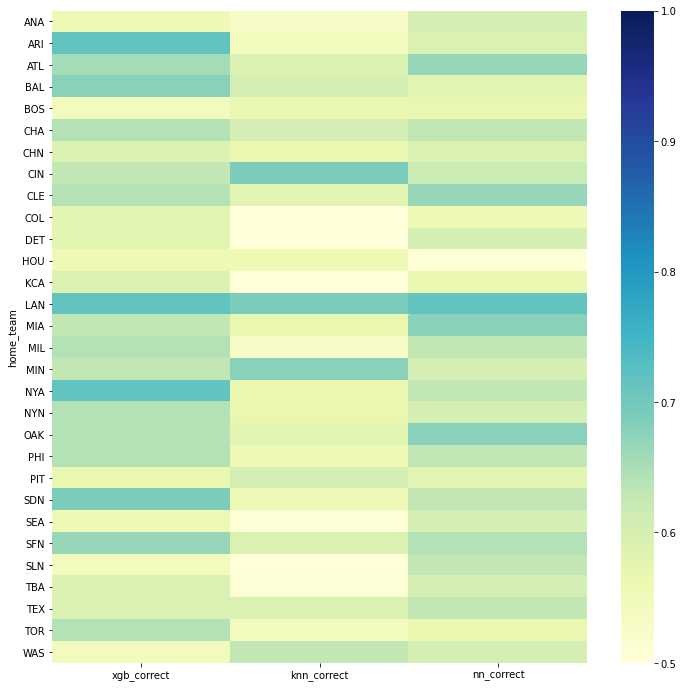

In [65]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_acc.loc[2017], vmin=0.5, vmax=1, cmap="YlGnBu");

## Predicted probabilities

Do the models predicted probabilities serve as a useful proxy for confidence in their prediction?

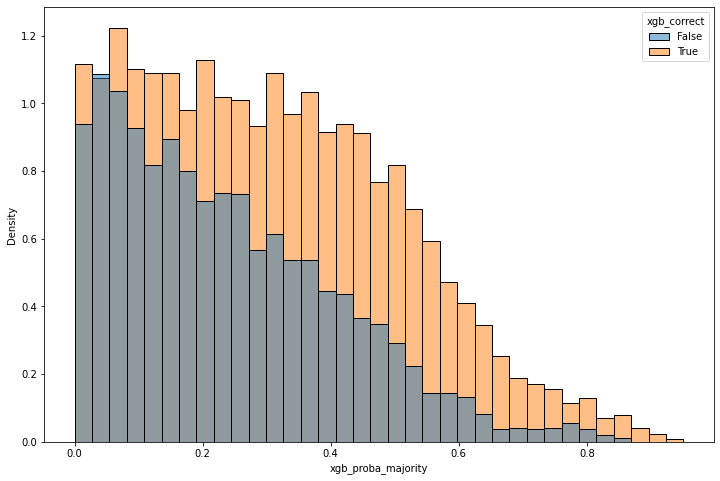

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='xgb_proba_majority', hue='xgb_correct', stat='density');

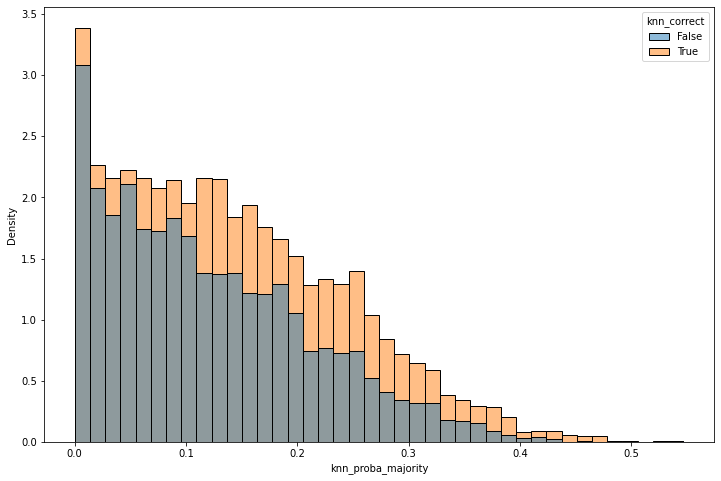

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='knn_proba_majority', hue='knn_correct', stat='density');

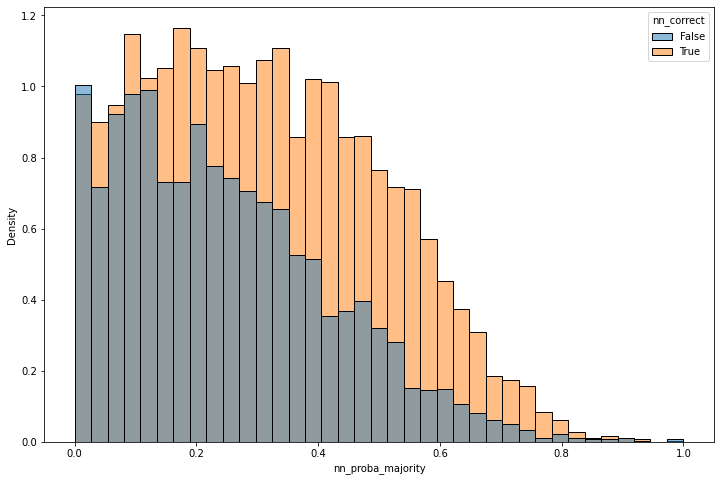

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='nn_proba_majority', hue='nn_correct', stat='density');

In [30]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,nn_pred,xgb_proba,knn_proba,nn_proba,xgb_correct,knn_correct,nn_correct,xgb_proba_majority,knn_proba_majority,nn_proba_majority
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,1,0.562908,0.566667,0.590414,True,True,True,0.125817,0.133333,0.180827
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,1,0.533676,0.573333,0.563689,True,True,True,0.067352,0.146667,0.127378
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,1,0.454400,0.626667,0.666198,True,False,False,0.091201,0.253333,0.332396
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,1,0.450952,0.586667,0.531114,True,False,False,0.098096,0.173333,0.062229
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,1,0.584152,0.620000,0.562535,False,False,False,0.168304,0.240000,0.125070


In [65]:
mlb_df = pd.read_csv('../data/morgan_mlb_data.csv')

In [66]:
mlb_df.head()

,Unnamed: 0,Unnamed: 0.1,date_x,Y_x,home_team_x,away_team_x,home_win_x,home_score,away_score,home_total_R,...,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,team_Rank_pct_diff,team_FP_pct_diff,R_pct_diff,RA_pct_diff,pytha_pct_diff,win_pct_diff,bayes_pct_diff
0,0,0,2001-04-01,2001,TOR,TEX,1,8,1,0,...,-6.769826,-8.380988,14.457831,-33.333333,0.609756,NaN,NaN,NaN,NaN,-0.0
1,1,1,2001-04-02,2001,BAL,BOS,1,2,1,0,...,21.042831,13.851600,-14.864865,50.000000,-0.101937,NaN,NaN,NaN,NaN,-0.0
2,2,2,2001-04-02,2001,CHN,WAS,0,4,5,0,...,2.281369,-1.681592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0
3,3,3,2001-04-02,2001,CIN,ATL,0,4,10,0,...,6.235566,8.159479,-11.764706,50.000000,0.305499,NaN,NaN,NaN,NaN,-0.0
4,4,4,2001-04-02,2001,CLE,CHA,0,4,7,0,...,3.512397,3.018479,-5.555556,50.000000,1.012146,NaN,NaN,NaN,NaN,-0.0


In [67]:
list(mlb_df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'date_x',
 'Y_x',
 'home_team_x',
 'away_team_x',
 'home_win_x',
 'home_score',
 'away_score',
 'home_total_R',
 'home_total_RA',
 'away_total_R',
 'away_total_RA',
 'home_win_pct',
 'away_win_pct',
 'home_pythag_expect',
 'away_pythag_expect',
 'home_win_diff',
 'away_win_diff',
 'M_x',
 'D_x',
 'home_previous_WL',
 'away_previous_WL',
 'home_bayes_win',
 'away_bayes_win',
 'home_win_diff_bayes',
 'away_win_diff_bayes',
 'log_5',
 'date_y',
 'Y_y',
 'M_y',
 'D_y',
 'home_team_y',
 'away_team_y',
 'home_win_y',
 'home_pitcher',
 'away_pitcher',
 'home_elo',
 'away_elo',
 'home_avg',
 'away_avg',
 'home_obp',
 'away_obp',
 'home_slg',
 'away_slg',
 'home_iso',
 'away_iso',
 'elo_diff',
 'elo_pct_diff',
 'avg_diff',
 'obp_diff',
 'slg_diff',
 'avg_pct_diff',
 'obp_pct_diff',
 'slg_pct_diff',
 'home_rest',
 'away_rest',
 'away_team_season_game_num',
 'home_team_season_game_num',
 'home_Avg_Attendance_offset1year',
 'home_W-L-pct_offset1year',
 'home_Rank_o

In [68]:
mlb_df['score_diff'] = np.abs(mlb_df['home_score'] - mlb_df['away_score'])

In [69]:
mlb_df = mlb_df[['home_team_x', 'away_team_x', 'score_diff', 'Y_x', 'M_x']]

In [70]:
mlb_df.columns = ['home_team', 'away_team', 'score_diff', 'Y', 'M']

In [71]:
mlb_df.head()

,home_team,away_team,score_diff,Y,M
0,TOR,TEX,7,2001,4
1,BAL,BOS,1,2001,4
2,CHN,WAS,1,2001,4
3,CIN,ATL,6,2001,4
4,CLE,CHA,3,2001,4


In [89]:
df_with_diff[df_with_diff['score_diff'] == 0]

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,xgb_proba,knn_proba,nn_proba,xgb_correct,knn_correct,nn_correct,xgb_proba_majority,knn_proba_majority,nn_proba_majority,score_diff
7372,PIT,CHN,2016,9,-24.322289,-25.696222,-28.798020,-4.024768,7.026146,1.020408,...,0.272677,0.560000,0.218082,True,False,True,0.454646,0.120000,0.563837,0
7416,PIT,CHN,2016,9,-30.508474,-28.250400,-28.260870,-4.024768,7.026146,1.020408,...,0.205322,0.606667,0.211013,True,False,True,0.589356,0.213333,0.577975,0
7465,PIT,CHN,2016,9,-12.453412,-13.402061,-15.003902,-4.024768,7.026146,1.020408,...,0.419215,0.646667,0.287842,False,True,False,0.161570,0.293333,0.424316,0
7502,PIT,CHN,2016,9,-2.597403,-4.503145,-9.437229,-4.024768,7.026146,1.020408,...,0.509449,0.586667,0.377505,False,False,True,0.018898,0.173333,0.244991,0


In [74]:
df_with_diff = df.merge(mlb_df, how='left', on=['home_team', 'away_team', 'Y', 'M'])

In [75]:
df_with_diff.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,xgb_proba,knn_proba,nn_proba,xgb_correct,knn_correct,nn_correct,xgb_proba_majority,knn_proba_majority,nn_proba_majority,score_diff
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.562908,0.566667,0.590414,True,True,True,0.125817,0.133333,0.180827,1
1,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.562908,0.566667,0.590414,True,True,True,0.125817,0.133333,0.180827,2
2,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,0.533676,0.573333,0.563689,True,True,True,0.067352,0.146667,0.127378,3
3,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,0.533676,0.573333,0.563689,True,True,True,0.067352,0.146667,0.127378,1
4,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,0.533676,0.573333,0.563689,True,True,True,0.067352,0.146667,0.127378,4


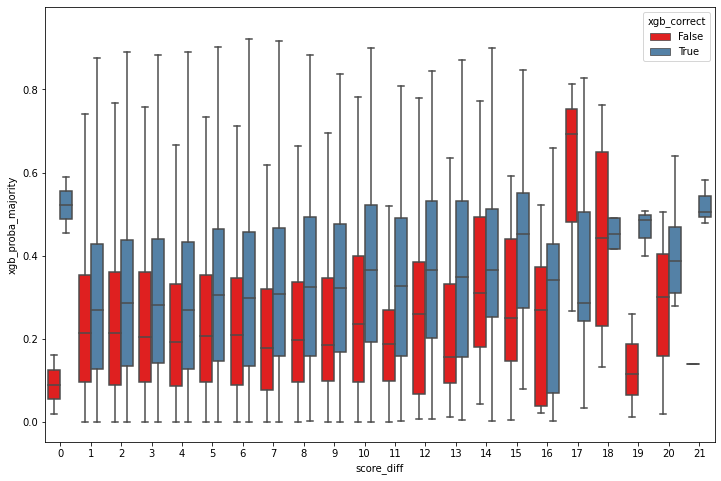

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_with_diff, x='score_diff', y='xgb_proba_majority', hue='xgb_correct',
           palette=['r', 'steelblue'], fliersize=0);

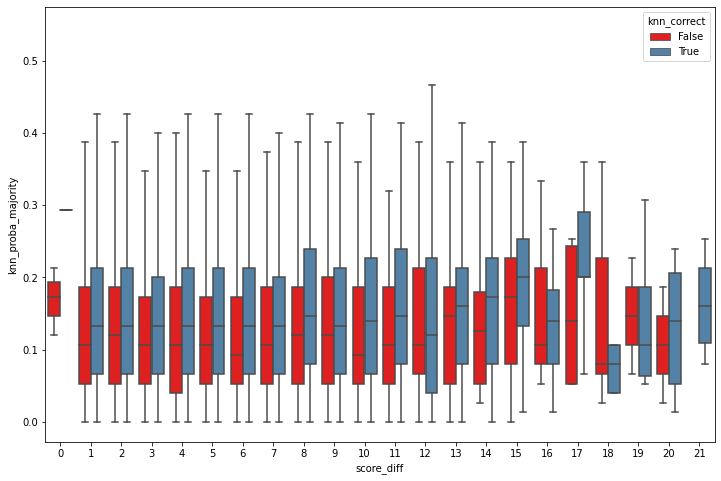

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_with_diff, x='score_diff', y='knn_proba_majority', hue='knn_correct',
           palette=['r', 'steelblue'], fliersize=0);

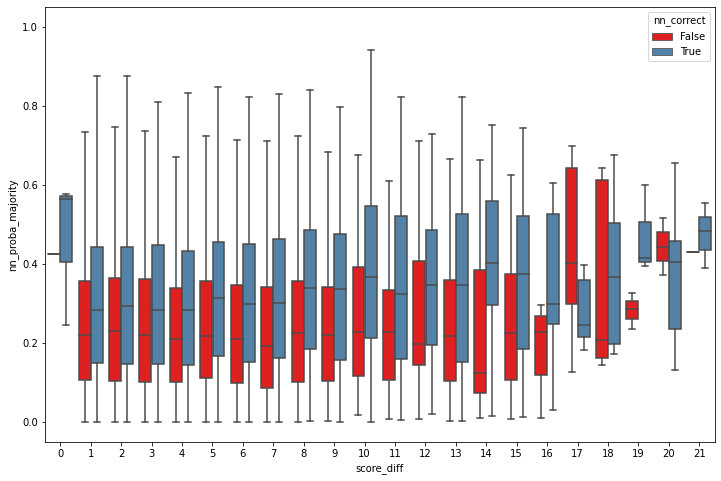

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_with_diff, x='score_diff', y='nn_proba_majority', hue='nn_correct',
           palette=['r', 'steelblue'], fliersize=0);